### Imports

In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

### Load dataset

In [2]:
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Training the model - MLP with exploding gradients

In [3]:
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9))
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

### Evaluate the model

In [4]:
test_mse = model.evaluate(X_test, y_test, verbose=0)
print(test_mse)

nan


### Plot loss

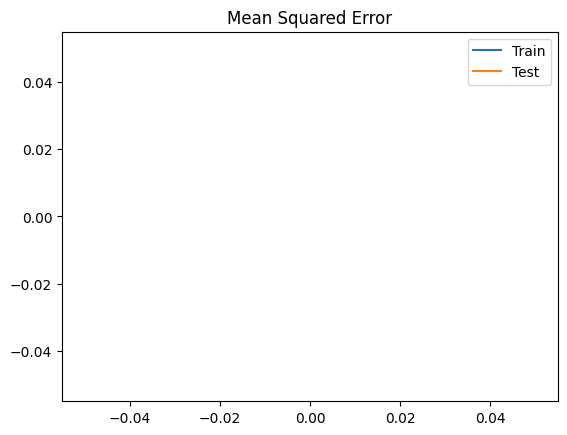

In [5]:
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

### Training the model - MLP with gradient norm scaling

In [6]:
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9, clipnorm=1.0))
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [7]:
test_mse = model.evaluate(X_test, y_test, verbose=0)
print(test_mse)

0.9613165855407715


### Plot loss

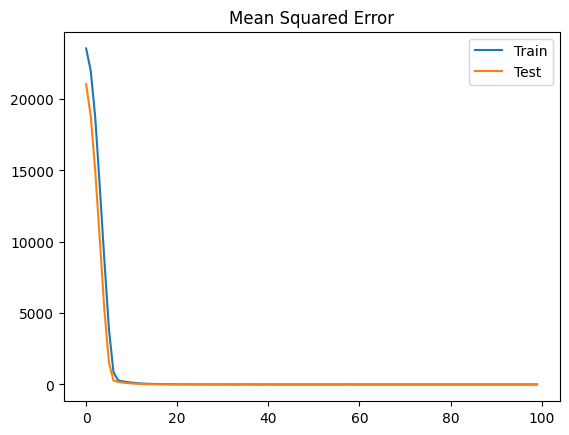

In [8]:
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

### Training the model - MLP with gradient value clipping

In [9]:
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9, clipvalue=5.0))
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [10]:
test_mse = model.evaluate(X_test, y_test, verbose=0)
print(test_mse)

12.049456596374512


### Plot loss

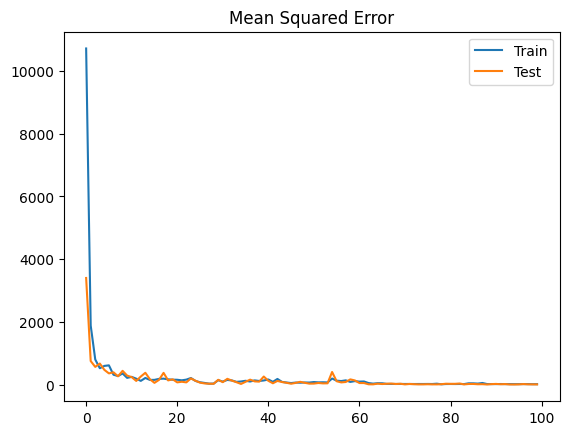

In [11]:
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()